###### Analysis From Project 1
Predicting whether the Deoartment of Sanitation in New York City will take action or not take action regarding snow complaints. The data used was NYC 311 complaints data filtered to only include snow complaints from 2010 -2018. Intially the dataset included 80,000+ rows. After filtering rows with missing data this number was reduced to approximately 54,000. Giving the time sensitive nature of snow actually remaining on the ground records witha response time of greater than 17 days were removed. Since it is almost a certainty that no action would/could be taken regarding the original complaint.The columns Agency Name,Borough,Closed Date,Created Date, Cross Street 1, Cross Street 2, Descriptor, Location Type, Resolution, Action Updated Date, Resolution Description,Status, Street Name, and Unique Key were removed. Cross Street 2 was removed due the perfect correlation with Cross Street 1. Street Name was removed due to its lack of  importance in this calculation. Research done while conducting the data indicated that the Borough and the Community Board represented a greater significance to the action taken. Also keeping the street name would require further data processing and transformation with minimal gained benefit. To create the model of action (not) taken 6 columns were used: Borough, Days Needed to Resolve Complaint, Community Board, Descriptor, Action Taken, Open Data Channel Type.


In [165]:
#Python libraries tested or used
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

#### Loading Data into Panda Data Frame

In [166]:
#311 snow complaint record
data = pd.read_csv('snow_311.csv')

In [167]:
print(data.columns)

Index(['Borough', 'Days Needed to Resolve Complaint', 'Community Board',
       'Descriptor', 'Action Taken', 'Open Data Channel Type'],
      dtype='object')


In [168]:
print(data.shape)

(51477, 6)


#### Drop performed to ensure no rows were kept with missing data

In [169]:

data.dropna()

,Borough,Days Needed to Resolve Complaint,Community Board,Descriptor,Action Taken,Open Data Channel Type
0,BRONX,1,02 BRONX,15S Re-Plow/Spread/Ice-Snow Cond.,No Action Taken,ONLINE
1,BROOKLYN,0,05 BROOKLYN,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
2,BROOKLYN,1,15 BROOKLYN,15S Re-Plow/Spread/Ice-Snow Cond.,No Action Taken,ONLINE
3,QUEENS,0,01 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
4,QUEENS,0,05 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
5,QUEENS,0,11 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
6,QUEENS,0,13 QUEENS,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
7,STATEN ISLAND,0,02 STATEN ISLAND,15S Re-Plow/Spread/Ice-Snow Cond.,Action Taken,ONLINE
8,BRONX,1,06 BRONX,E9 Snow / Icy Sidewalk,No Action Taken,ONLINE
9,BRONX,2,10 BRONX,E9 Snow / Icy Sidewalk,No Action Taken,ONLINE


In [170]:
data.dtypes
cat_columns = data.columns


In [171]:
data['Borough'] = data['Borough'].astype('category')
data['Community Board'] = data['Community Board'].astype('category')
data['Descriptor'] = data['Descriptor'].astype('category')
data['Open Data Channel Type'] = data['Open Data Channel Type'].astype('category')
data['Action Taken'] = data['Action Taken'].astype('category')
data['Days Needed to Resolve Complaint'] = data['Days Needed to Resolve Complaint'].astype('category')



#### Transforming Data to Perform Categorical Machine Learning

In [172]:
for name in cat_columns:
    data[name] = data[name].astype('category')
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [173]:
data.dtypes

Borough                             int8
Days Needed to Resolve Complaint    int8
Community Board                     int8
Descriptor                          int8
Action Taken                        int8
Open Data Channel Type              int8
dtype: object

#### 311 data after transformation 

In [174]:
data

,Borough,Days Needed to Resolve Complaint,Community Board,Descriptor,Action Taken,Open Data Channel Type
0,0,1,5,1,1,1
1,1,0,20,1,0,1
2,1,1,55,1,1,1
3,3,0,3,1,0,1
4,3,0,22,1,0,1
5,3,0,46,1,0,1
6,3,0,52,1,0,1
7,4,0,9,1,0,1
8,0,1,23,3,1,1
9,0,2,39,3,1,1


#### Correlation Matrix showing the strength of the correlation between variables 

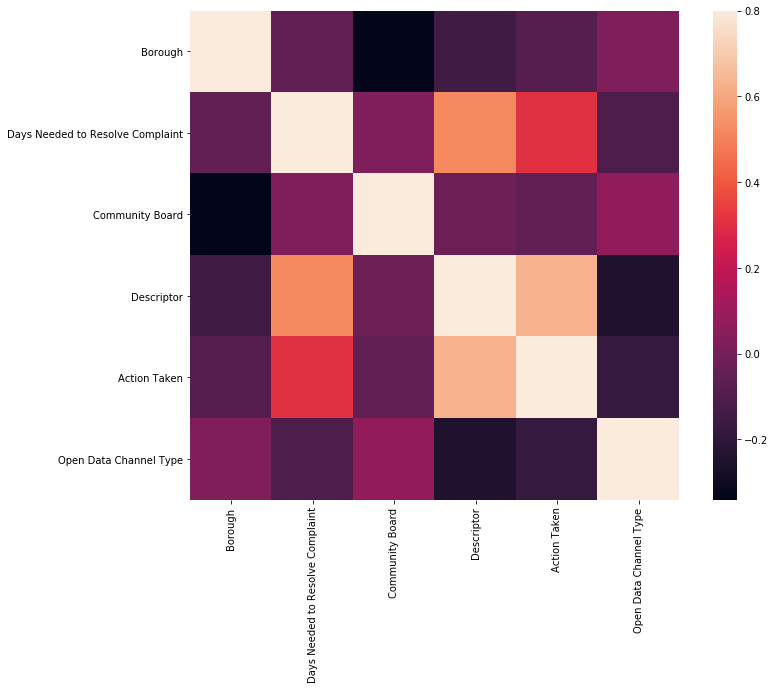

In [175]:
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#### Setting Action Taken as the target variable

In [176]:
yy = data['Action Taken']
yy = yy.astype('category')
y = pd.DataFrame(yy, columns = ['Action Taken'])
del data['Action Taken']

#### Train/Test Split 

In [177]:
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify = y, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(38607, 5) (38607, 1)
(12870, 5) (12870, 1)


### Default Nearest Neighbor Classifier 

In [178]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel())
y_pred= knn.predict(X_test)
cv_results = cross_val_score(knn, data, yy, cv=5)

In [179]:
print(("5-Fold CV Score: {}".format(cv_results)))
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

5-Fold CV Score: [0.83187646 0.76670552 0.7943662  0.78581836 0.80427392]
Average 5-Fold CV Score: 0.7966080897139662


#### Nearest Neighnor Setting power =1 (utilizing manhattan_distance)

In [181]:
knn = KNeighborsClassifier(p=1)
knn.fit(X_train,y_train.values.ravel())
y_pred= knn.predict(X_test)
cv_results = cross_val_score(knn, data, yy, cv=5)

In [182]:
print(("5-Fold CV Score: {}".format(cv_results)))
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

5-Fold CV Score: [0.83177933 0.76719114 0.79475474 0.78562409 0.80466246]
Average 5-Fold CV Score: 0.7968023512292575


#### Nearest Neighbor Testing Different n_Neighbor Values 1-9

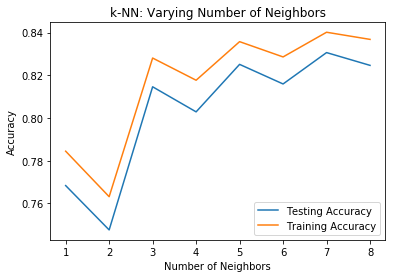

In [183]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train.values.ravel())
    y_pred= knn.predict(X_test)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train.values.ravel())

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test.values.ravel())

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#### Nearest Neighbor with N =9

In [184]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train.values.ravel())
y_pred= knn.predict(X_test)
cv_results = cross_val_score(knn, data, yy, cv=5)

In [185]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))

Accuracy: 0.8328671328671329
Precision: 0.830365037261589
Recall: 0.8905445678677865
F1 score: 0.859402575331721


#### Nearest Neighbor Best & Worst Analysis

•	Adjusting the power to 1 has a negligible impact on the model’s accuracy score in comparison to the default Nearest Neighbor.

•   Graphing the training accuracy vs testing accuracy for varying nearest neighbor values shows that the training model always     slightly out performs the testing model but this value is negligible. The graph also shows that there is very little gained as it relates to improving the accuracy of the model.

•    The precision score of 0.83 indicates that the model predicts 83 out of every 100 values.

•    The recall score of 0.89 indicates that if the model picked 100 values it would be correct 89 times.

•    The f-score taking both precision and recall into account estimates the model's precision as 0.85 meaning that the model predicts 85 of every 100 values correctly when both recall and precision are considered in the calculation of the value.


#### Default Decission Tree

In [186]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cv_results = cross_val_score(clf, data, yy, cv=5)

In [187]:
print(("5-Fold CV Score: {}".format(cv_results)))
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

5-Fold CV Score: [0.8517871  0.79312354 0.81389024 0.80660515 0.83302574]
Average 5-Fold CV Score: 0.8196863543342416


#### Decission Tree Classifier: Utilizing Random Splitter 

In [188]:
clf = DecisionTreeClassifier(splitter="random",)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
cv_results = cross_val_score(clf, data, yy, cv=5)

In [189]:
print(("5-Fold CV Score: {}".format(cv_results)))
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

5-Fold CV Score: [0.8525641  0.79360917 0.81398737 0.8053424  0.83322001]
Average 5-Fold CV Score: 0.8197446105241151


#### Testing Maximum Depth 1-32

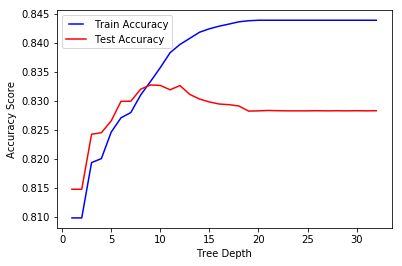

In [190]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy Score')
plt.xlabel('Tree Depth')
plt.show()


#### DecisionTreeClassifier, set 'entropy' as the information criterion, random_state 1 & max depth to 8

In [191]:
clf = DecisionTreeClassifier(max_depth=8, criterion= 'entropy', random_state=1)
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
cv_results = cross_val_score(clf, data, yy, cv=5)

In [192]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))

Accuracy: 0.8457653457653458
Precision: 0.8304150850985674
Recall: 0.9187212137632078
F1 score: 0.8723390571740948


#### Decission Tree Best & Worst Analysis

•   Adjusting the splitter from the default setting to random has a negligible impact on the model’s accuracy score in comparison to the default Nearest Neighbor.

•   Graphing the training accuracy vs testing accuracy for varying maximum depth levels resulted in 8 being identified as the depth which the training accuracy and testing accuracy intersect.The graph also shows a maximum depth increases the training model accuracy by a single percentage point while creating a divide between the testing and training accuracy. The difference in accuracy while graphically appearing wide is only 1-2 percent. 

•    The precision score of 0.83 indicates that the model predicts 83 out of every 100 values.

•    The recall score of 0.91 indicates that if the model picked 100 values it would be correct 91 times.

•    The f-score taking both precision and recall into account estimates the model's precision as 0.87 meaning that the model predicts 85 of every 100 values correctly when both recall and precision are considered in the calculation of the value.
• The Decision Tree when optimized by the user appears to outperform the Nearest Neighbor based on the precision, recall, and f-score
